# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('seaborn-darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
df.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   51066 non-null  object
 1   Date Received  50996 non-null  object
 2   Incident Date  50496 non-null  object
 3   Airport Code   49014 non-null  object
 4   Airport Name   49014 non-null  object
 5   Airline Name   42511 non-null  object
 6   Claim Type     49106 non-null  object
 7   Claim Site     50876 non-null  object
 8   Item           50054 non-null  object
 9   Claim Amount   50074 non-null  object
 10  Status         51065 non-null  object
 11  Close Amount   33786 non-null  object
 12  Disposition    32846 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
info = pd.DataFrame({})

info['dataFeatures'] = df.columns
info['dataType'] = df.dtypes.tolist()
info['null'] = df.isna().sum().tolist()
info['nullPct'] = round(df.isna().sum() / df.shape[0] * 100, 2).tolist()
info['uniqueSample'] = [df[feature].drop_duplicates().sample(2).values for feature in df.columns]

info

,dataFeatures,dataType,null,nullPct,uniqueSample
0,Claim Number,object,0,0.00,"[2005022376650, 2005012874718]"
1,Date Received,object,70,0.14,"[14-Sep-04, 1-May-07]"
2,Incident Date,object,570,1.12,"[3/2/2012 17:00, 9/27/2013 9:15]"
3,Airport Code,object,2052,4.02,"[WRG, PVD]"
4,Airport Name,object,2052,4.02,"[Unspecified Personal Injury, Nantucket Memori..."
5,Airline Name,object,8555,16.75,"[SkyBus, Great Lakes Airline]"
6,Claim Type,object,1960,3.84,"[Personal Injury, Motor Vehicle]"
7,Claim Site,object,190,0.37,"[Checked Baggage, Other]"
8,Item,object,1012,1.98,[Clothing - Shoes; belts; accessories; etc.; L...
9,Claim Amount,object,992,1.94,"[$1;191.04 , $39.06 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
df.replace('-', np.nan, inplace=True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [9]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
# df['Incident Date'] = pd.to_datetime(df['Incident Date'])  # throw an error

In [10]:
err_idx = []

for idx, val in enumerate(df['Incident Date']):
    try:
        err = re.findall(r'\d{1,2}-\w{3}-\d{4}', val)
        if err:
            err_idx.append(idx)
    except TypeError:
        continue

In [11]:
df.iloc[err_idx, :]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [12]:
year_ = []

for j, k in zip(df.loc[err_idx, 'Incident Date'].str[:7], df.loc[err_idx, 'Date Received'].dt.year):
     year_.append(j + str(k))

In [13]:
df.loc[err_idx, 'Incident Date'] = year_

In [14]:
df.iloc[err_idx, :]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-2005,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-2005,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-2005,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-2005,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-2005,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-2005,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-2005,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-2005,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-2005,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-2005,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [16]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   51066 non-null  object        
 1   Date Received  50996 non-null  datetime64[ns]
 2   Incident Date  50496 non-null  datetime64[ns]
 3   Airport Code   48915 non-null  object        
 4   Airport Name   48915 non-null  object        
 5   Airline Name   41470 non-null  object        
 6   Claim Type     49035 non-null  object        
 7   Claim Site     50817 non-null  object        
 8   Item           48918 non-null  object        
 9   Claim Amount   46886 non-null  object        
 10  Status         47877 non-null  object        
 11  Close Amount   33786 non-null  object        
 12  Disposition    32846 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [18]:
df.iloc[err_idx, :]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [19]:
df['Day Differences'] = df['Date Received'] - df['Incident Date']
df['Day Differences'] = df['Day Differences'].apply(lambda x: x.days)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

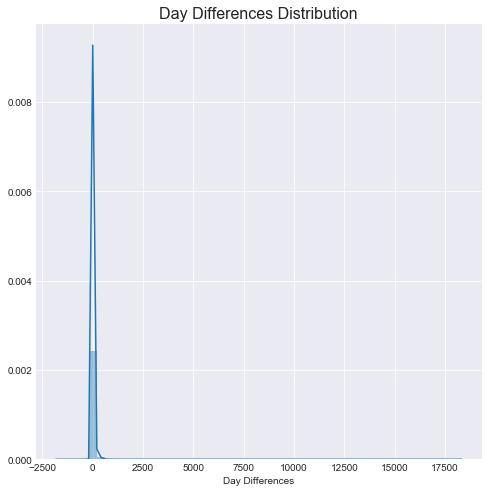

In [34]:
plt.figure(figsize=(8, 8))
sns.distplot(df['Day Differences'].dropna())
plt.xlabel('Day Differences')
plt.title('Day Differences Distribution', fontsize=16)
plt.show()

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

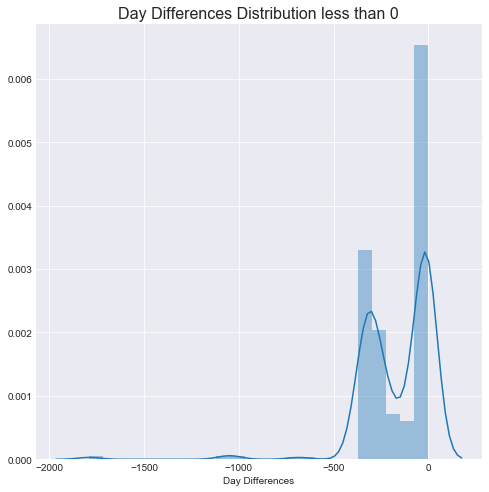

In [35]:
less_0_notnull = df[(df['Day Differences'] < 0) & df['Day Differences'].notnull()]

plt.figure(figsize=(8, 8))
sns.distplot(less_0_notnull['Day Differences'])
plt.xlabel('Day Differences')
plt.title('Day Differences Distribution less than 0', fontsize=16)
plt.show()

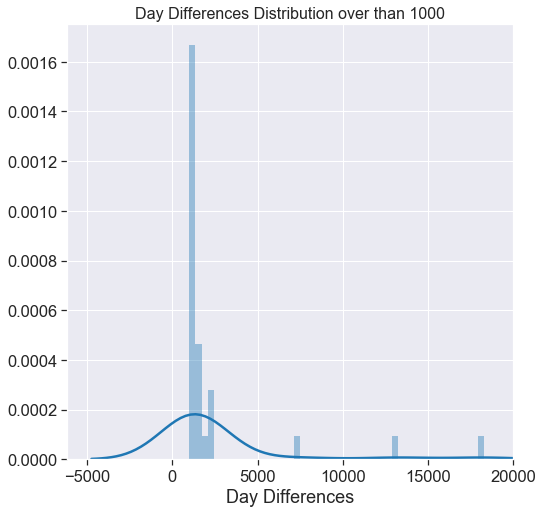

In [84]:
over_0_notnull = df[(df['Day Differences'] > 1000) & df['Day Differences'].notnull()]

plt.figure(figsize=(8, 8))
sns.distplot(over_0_notnull['Day Differences'])
plt.xlim(right=20000)
plt.xlabel('Day Differences')
plt.title('Day Differences Distribution over than 1000', fontsize=16)
plt.show()

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

1. Maybe because they was tired or didn't aware before, so they didn't claim, until they found them property was damaged, lost or stolen, then they just claimed
1. Maybe because they got a lot of bad experience (always get trouble), so they often claiming before they made a plane trip

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [58]:
df['Claim Amount'] = df['Claim Amount'].replace('[\$;,]', '', regex=True)
df['Close Amount'] = df['Close Amount'].replace('[\$;,]', '', regex=True)

df['Claim Amount'] = df['Claim Amount'].astype(float)
df['Close Amount'] = df['Close Amount'].astype(float)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Claim Number     51066 non-null  object        
 1   Date Received    50996 non-null  datetime64[ns]
 2   Incident Date    50496 non-null  datetime64[ns]
 3   Airport Code     48915 non-null  object        
 4   Airport Name     48915 non-null  object        
 5   Airline Name     41470 non-null  object        
 6   Claim Type       49035 non-null  object        
 7   Claim Site       50817 non-null  object        
 8   Item             48918 non-null  object        
 9   Claim Amount     46886 non-null  float64       
 10  Status           47877 non-null  object        
 11  Close Amount     33786 non-null  float64       
 12  Disposition      32846 non-null  object        
 13  Day Differences  50460 non-null  float64       
dtypes: datetime64[ns](2), float64(3), obje

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [72]:
df['Amount Differences'] = df['Claim Amount'] - df['Close Amount']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Claim Number        51066 non-null  object        
 1   Date Received       50996 non-null  datetime64[ns]
 2   Incident Date       50496 non-null  datetime64[ns]
 3   Airport Code        48915 non-null  object        
 4   Airport Name        48915 non-null  object        
 5   Airline Name        41470 non-null  object        
 6   Claim Type          49035 non-null  object        
 7   Claim Site          50817 non-null  object        
 8   Item                48918 non-null  object        
 9   Claim Amount        46886 non-null  float64       
 10  Status              47877 non-null  object        
 11  Close Amount        33786 non-null  float64       
 12  Disposition         32846 non-null  object        
 13  Day Differences     50460 non-null  float64   

In [63]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

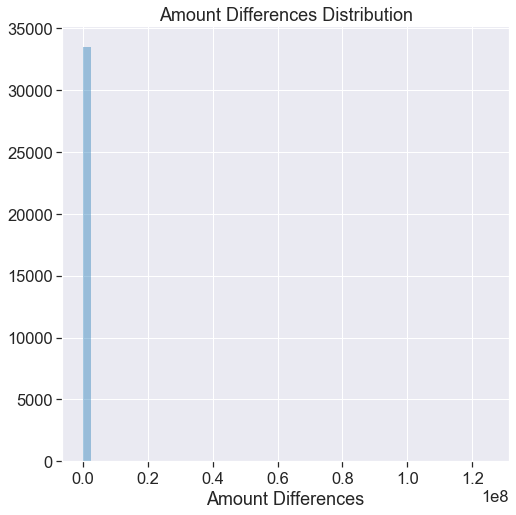

In [85]:
plt.figure(figsize=(8, 8))
sns.distplot(df['Amount Differences'].dropna(), kde=False)
plt.title('Amount Differences Distribution')
plt.xlabel('Amount Differences')
plt.show()

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [160]:
Q1_amount = df['Amount Differences'].describe()['25%']
Q3_amount = df['Amount Differences'].describe()['75%']
IQR = Q3_amount - Q1_amount

outliers = df[(df['Amount Differences'] <= (Q1_amount - 1.5 * IQR)) | (df['Amount Differences'] >= (Q3_amount + 1.5 * IQR))].index

In [166]:
df.loc[outliers]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [168]:
df['Claim Amount'].describe()

count    4.688600e+04
mean     4.407323e+03
std      5.807553e+05
min      0.000000e+00
25%      2.702250e+01
50%      1.135100e+02
75%      3.495775e+02
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [169]:
df['Close Amount'].describe()

count     33786.000000
mean        101.841162
std        1468.609392
min           0.000000
25%           0.000000
50%           0.000000
75%          70.000000
max      250000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

## Yes i agree, because of:
1. insurence (baggage)
1. Every country have customs rules about money declaration, If they want to claim as they said just follow the legal declaration letter from destination bank or customs.
1. Maybe they have a valuables things, so they got angry and request for bigger money than what it should be, especially because of property loss 

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

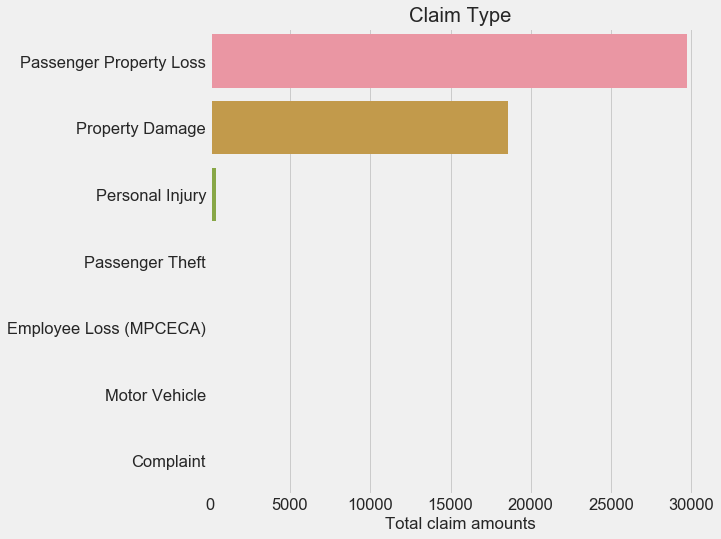

In [181]:
plt.style.use('fivethirtyeight')

display(df['Claim Type'].value_counts())

plt.figure(figsize=(8, 8))
sns.barplot(y=df['Claim Type'].value_counts().index, x=df['Claim Type'].value_counts().values)
plt.xlabel('Total claim amounts')
plt.title('Claim Type')
plt.show()

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

### Yes, Airlines have a relationship with claim number (REALLY ??)
* The bigger the company, more people tend to choose them for traveling
* The more passenger, the more total claimed on this (BIG) company

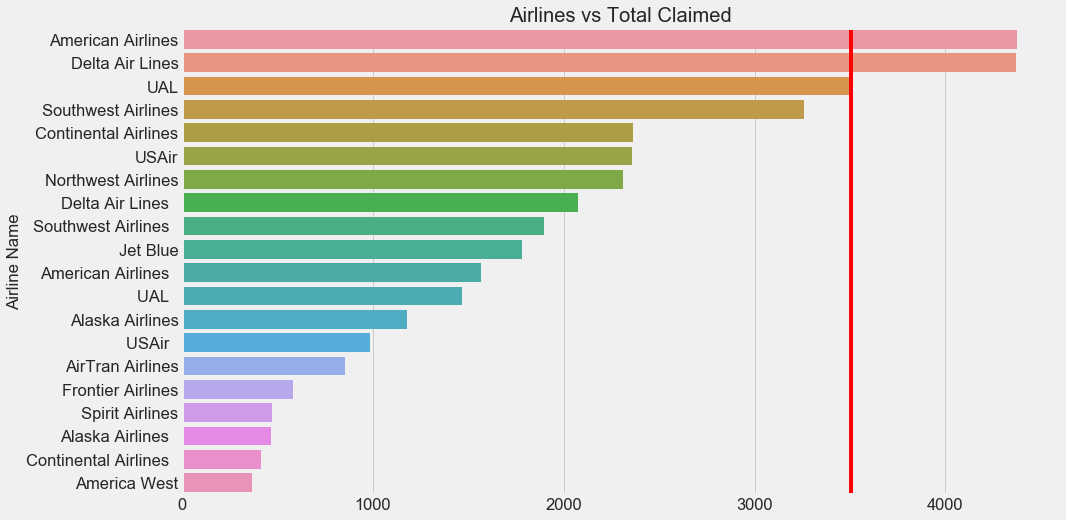

In [211]:
airlines_total_claim = df.groupby('Airline Name')['Claim Number'].count().sort_values(ascending=False)[:20]

plt.figure(figsize=(14, 8))
sns.barplot(y=airlines_total_claim.index, x=airlines_total_claim.values)
plt.axvline(3507, color='red')
plt.title('Airlines vs Total Claimed');

American Airlines merupakan maskapai penerbangan terbesar di dunia jika dilihat dari jumlah armada dan pendapatannya, dan merupakan maskapai penerbangan terbesar kedua di dunia jika dilihat dari jumlah destinasinya, setelah **United Airlines**.

[Source: Wikipedia](https://id.wikipedia.org/wiki/American_Airlines)

#### How about other airlines?

* Although United Airlines was became number 2 (after American Airlines) in 2016, but it still a big difference in total claimed
* In December 2006, Delta Air Lines was became the only US airline to fly from / to the African continent

In my oppinion, **MAYBE** United Airlines has better service than American Airlines because of big gap in total claimed, then **MAYBE** a lot of claimed to Delta Air Lines is because they flight to Africa, we know a lot of place there don't have good service & security enough

### They have a same percentage about claimed approved, just for information

In [240]:
American_ = df[df['Airline Name'] == 'American Airlines']['Status'].value_counts()
x1_ = round(American_.values[1] / American_.values.sum() * 100, 2)

Delta_ = df[df['Airline Name'] == 'Delta Air Lines']['Status'].value_counts()
x2_ = round(Delta_.values[1] / Delta_.values.sum() * 100, 2)

UAL_ = df[df['Airline Name'] == 'UAL']['Status'].value_counts()
x3_ = round(UAL_.values[1] / UAL_.values.sum() * 100, 2)

print('Claimed Approved in American Airlines:', x1_)
print('Claimed Approved in Delta Air Lines:', x2_)
print('Claimed Approved in UAL:', x3_)

Claimed Approved in American Airlines: 21.52
Claimed Approved in Delta Air Lines: 21.4
Claimed Approved in UAL: 21.25


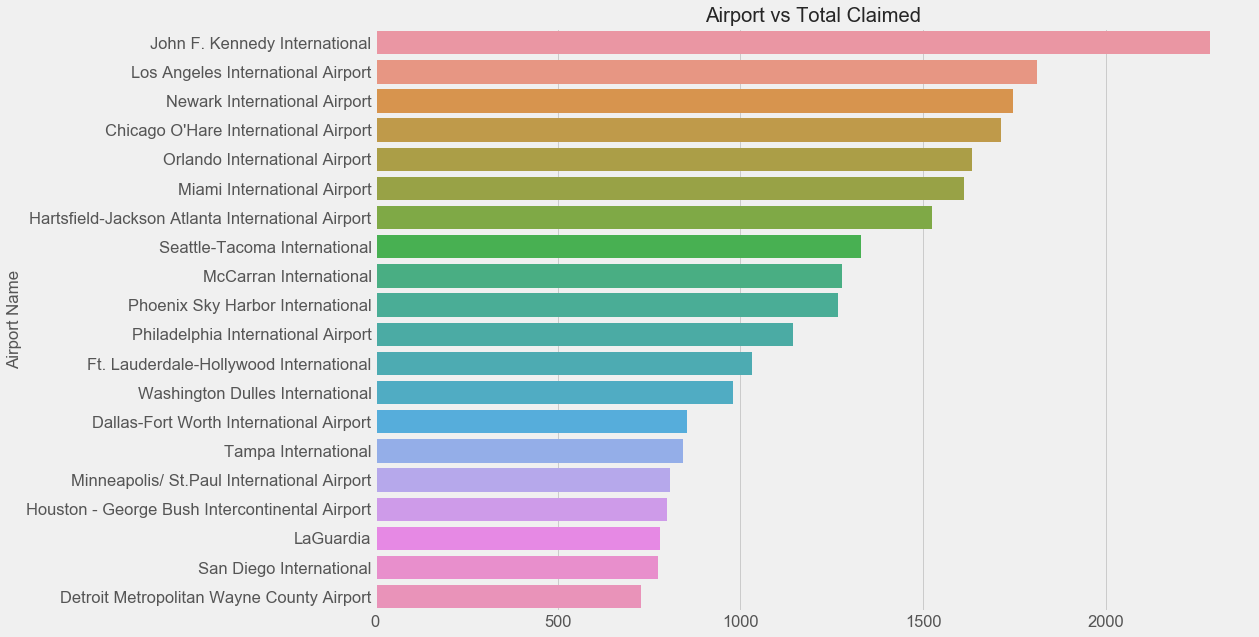

In [308]:
airport_total_claim = df.groupby('Airport Name')['Claim Number'].count().sort_values(ascending=False)[:20]

plt.figure(figsize=(14, 10))
sns.barplot(y=airport_total_claim.index, x=airport_total_claim.values)
plt.title('Airport vs Total Claimed');

Bandara ini merupakan salah satu gerbang masuk ke Amerika Serikat dan merupakan penghubung utama JetBlue Airways yang terletak di Terminal 6. JFK juga dipakai sebagai penghubung kedua American Airlines yang terletak di Terminal 8 dan 9. Delta Air Lines memakai bandara ini sebagai penghubung keempat terbesar mereka di Terminal 2 dan 3. British Airways memakai bandara ini sebagai penghubung kota London dengan frekuensi penerbangan 8 kali sehari dan United Airways memakainya dengan frekuensi penerbangan 16 kali sehari.

In [248]:
Kennedy_ = df[df['Airport Name'] == 'John F. Kennedy International']['Status'].value_counts()
y1_ = round(Kennedy_.values[1] / Kennedy_.values.sum() * 100, 2)

LA_ = df[df['Airport Name'] == 'Los Angeles International Airport']['Status'].value_counts()
y2_ = round(LA_.values[1] / LA_.values.sum() * 100, 2)

Newark_ = df[df['Airport Name'] == 'Newark International Airport']['Status'].value_counts()
y3_ = round(Newark_.values[1] / Newark_.values.sum() * 100, 2)

print('Claimed Approved in Kennedy International:', y1_)
print('Claimed Approved in LA International', y2_)
print('Claimed Approved in Newark International:', y3_)

Claimed Approved in Kennedy: 23.37
Claimed Approved in LA International 20.41
Claimed Approved in Newark International: 17.22


Interesing, Kennedy International have 23% approved on claimed status, big gap from LA International (20.4%) and Newark International (17.22%)

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [294]:
## important information is on front of the sentences
df['Item'] = df['Item'].replace('[\;,]', '', regex=True)

categories = []

for item in df['Item']:
    try:
        categories.append(item.split()[0])
    except:
        continue

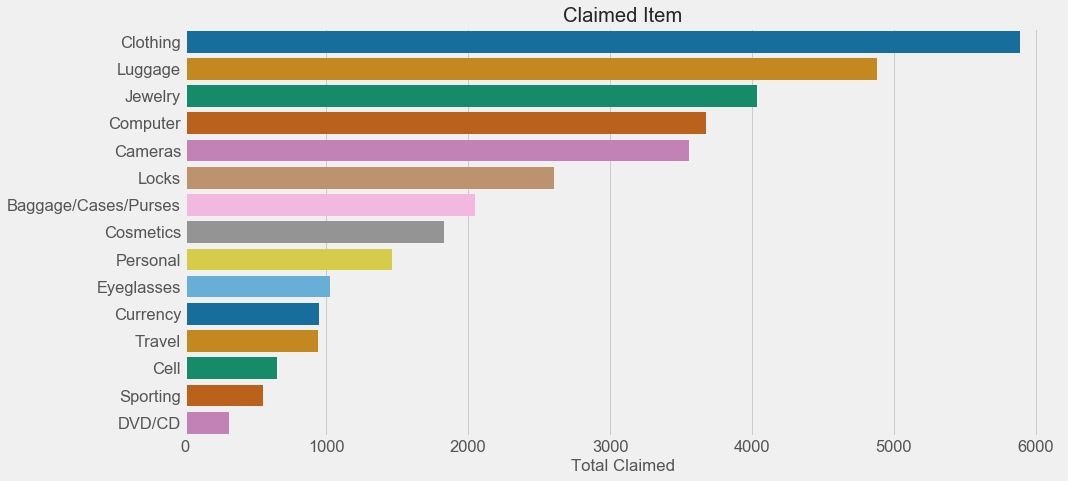

In [310]:
item_ = pd.Series(categories).value_counts().drop(labels='Other')[:15]

plt.figure(figsize=(14, 7))
sns.barplot(y=item_.index, x=item_.values, palette='colorblind')
plt.title('Claimed Item')
plt.xlabel('Total Claimed');

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [32]:
np.random.seed(101)

Export the data to your SQL database, and try to connect the database to the dashboard